# Final Model 3

_This model will use the information gleaned from the numerical and categorical columns and tests, and hope to create the best model for use._

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [4]:
num_train = pd.read_csv('../datasets/num_train.csv')
cat_train = pd.read_csv('../datasets/cat_train.csv')
num_test = pd.read_csv('../datasets/num_test.csv')
cat_test = pd.read_csv('../datasets/cat_test.csv')
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

X_num_train = num_train[['Overall Qual', 'Lot Area', 'Year Built', 'Year Remod/Add', 
                         'Mas Vnr Area','BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 
                         'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Screen Porch', 
                         'Pool Area', 'Misc Val', 'Kitchen Qual', 'Exter Qual', 'Bsmt Qual',
                         'Garage Cars', 'Garage Finish']]

y = train['SalePrice']

X_num_test = num_test [['Overall Qual', 'Lot Area', 'Year Built', 'Year Remod/Add', 
                        'Mas Vnr Area','Total Bsmt SF', 'BsmtFin SF 1', '1st Flr SF', 
                        'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Screen Porch', 
                        'Pool Area', 'Misc Val', 'Kitchen Qual', 'Exter Qual', 'Bsmt Qual',
                        'Garage Cars', 'Garage Finish']]

ss = StandardScaler()
X_nums = pd.DataFrame(ss.fit_transform(X_num_train), columns = X_num_train.columns)
X_nums_final = pd.DataFrame(ss.transform(X_num_test), columns = X_num_test.columns)

X_cat_train = cat_train[['Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
                         'Neighborhood_NridgHt', 'Neighborhood_OldTown',
                         'Neighborhood_StoneBr', 'Exterior 1st_CemntBd']]

X_cat_final = cat_test[['Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
                         'Neighborhood_NridgHt', 'Neighborhood_OldTown',
                         'Neighborhood_StoneBr', 'Exterior 1st_CemntBd']]

X = pd.concat([X_nums, X_cat_train], axis = 1, sort = False)
X_final = pd.concat([X_nums_final, X_cat_final], axis = 1, sort = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [5]:
lasso = LassoCV(n_alphas = 300, cv = 5)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.8774273301359881

In [6]:
cols = [col for col, val in enumerate(lasso.coef_) if val != 0]

In [7]:
X_train.columns[cols]

Index(['Overall Qual', 'Lot Area', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Kitchen Qual', 'Exter Qual', 'Bsmt Qual',
       'Garage Cars', 'Garage Finish', 'Neighborhood_BrkSide',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Exterior 1st_CemntBd'],
      dtype='object')

In [8]:
y_hat = lasso.predict(X_test)

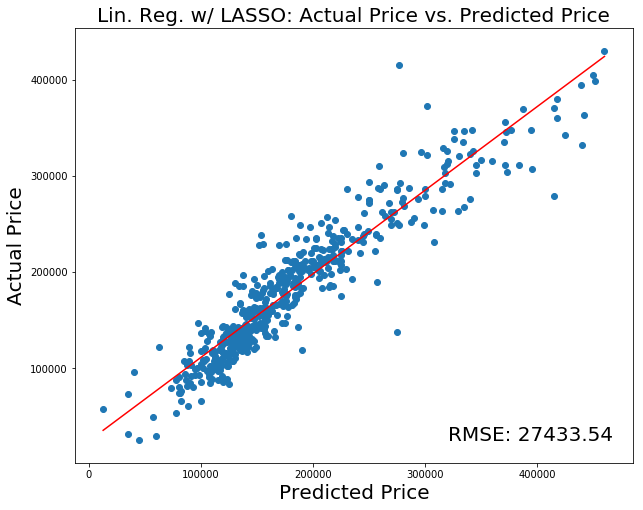

In [11]:
# Graphing true values vs. predicted values
plt.figure(figsize=(10,8), facecolor='w')
plt.title('Lin. Reg. w/ LASSO: Actual Price vs. Predicted Price', fontsize = 20)
plt.ylabel('Actual Price', fontsize = 20)
plt.xlabel('Predicted Price', fontsize = 20)
plt.plot(np.unique(y_test), 
         np.poly1d(np.polyfit(y_test, y_hat, 1))(np.unique(y_test)),
         color = 'red')
plt.scatter(y_test, y_hat)
plt.text(x=320000,y=25000, s="RMSE: 27433.54", fontsize=20);
plt.savefig('../images/previous_model.png', bbox_inches='tight')

In [10]:
mean_squared_error(y_test, y_hat) ** 0.5

27433.54195551988

In [232]:
y_hat = lasso.predict(X_final)

In [233]:
submission = test[['Id']]
submission['SalePrice'] = y_hat
submission.to_csv('../submissions/submission19.csv', index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
